
## VISUALES

### Vamos a empezar a estudiar donde han ocurrido mas accidentes y segun que año

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

In [3]:
df = pd.read_csv('shark_attack_no_unknowns.csv')
df_limpito = pd.read_csv('shark_attack_unknwons_1.csv')

In [7]:
df2 = pd.read_csv('shark_attack_unknowns.csv')

In [10]:
df3 = pd.read_csv('country_year_attacks.csv')

In [12]:
# YA HEMOS CARGADO LOS 3 DATA FRAMES QUE NECESITAMOS PARA HACER UNOS CUANTOS ESTUDIOS

In [13]:
# AHORA EMPIEZO A GENERAR PEQUEÑOS DATAFRAMES NUEVOS QUE ME AYADARAN A REPRESENTAR MEJOR LAS HIPOTESIS

In [14]:
grouped = df3['Country'].groupby(df3['Attacks']).value_counts()

In [98]:
df_grouped = pd.DataFrame(grouped)

In [17]:
df_grouped.columns = ['Att']

In [19]:
df_grouped.reset_index(inplace=True)

In [21]:
df_grouped.drop(['Attacks'], axis=1, inplace=True)

In [72]:
df_grouped3 = df3[(df3.Attacks > 5) & (df3.Year > 2000)] #mas de 5 ataques y que sean desde el 2000 hasta hoy

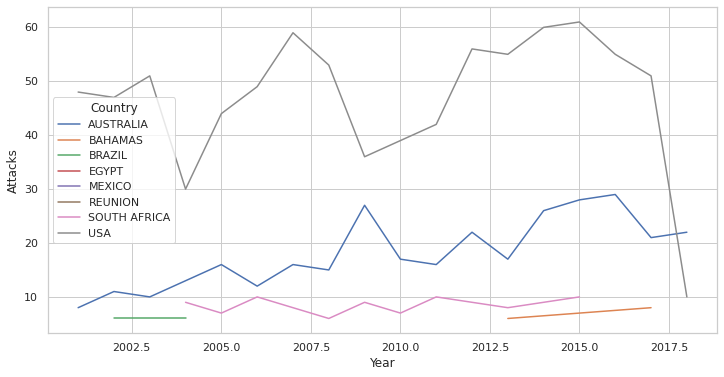

In [97]:
sns.lineplot(data=df_grouped3, x='Year', y='Attacks', hue='Country');

### STORYTELLING

En este grafico se pretende mostrar la evolucion de los ataques de los tiburones a lo largo de los años.
Se han hecho un par de filtros,el primero es que solo vamos a tener en cuenta los ataques mas o menos recientes, a aprtir del 2000. El segundo filtro que se ha puesto, para que tenga algo de mas validez, es que se ha decidido que solo se muestren los paises que por cada año ha sufrido mas de 5 ataques.
###### ¿Que sacamos de este grafico entoces?
Lo que vemos es que, Estados Unidos es el pais que mas ataques ha recibido cada año, hasta el año 2016, donde se ve un descenso de los mismo bastante drastico ( falta de datos ). Aun asivemos que no es una linea de ataques constante, puede variar de menos de 40 ataques en el año 2008, a llegar a mas de 60 en el 2015.
El segundo pais en recibir mas ataques por año es Australia ( vaya que sorpresa ). Pais famoso por esto mismo, aun por esas, sorprende la diferencia con EEUU. Esta linea es algo mas constante que la de Estados Unidos, seguramente gracias a que los datos son algo mas fiables. Se puede observar tambien que la tendencia de los ataques es a la alza. Sudafrica es el tercer pasi con mas ataques por año, tiene poco registro, aun asi una tendencia mas constante, en torno a los 10 ataques por año.


In [71]:
type_ataques = df2['Country'].groupby(df2['Type']).value_counts()

In [99]:
df_type_att = pd.DataFrame(type_ataques)

In [37]:
df_type_att.columns = ['Attacks']

In [38]:
df_type_att.reset_index(inplace=True)

#### Vamos a ver la cantidad de ataques provocados desde el inicion de este dataset hasta el dia de hoy y lo vamos a representar

In [47]:
df_type_provoked = df_type_updated[(df_type_updated.Type == 'Provoked')]

In [48]:
df_provoked_plot = df_type_provoked[(df_type_provoked.Attacks > 10)]

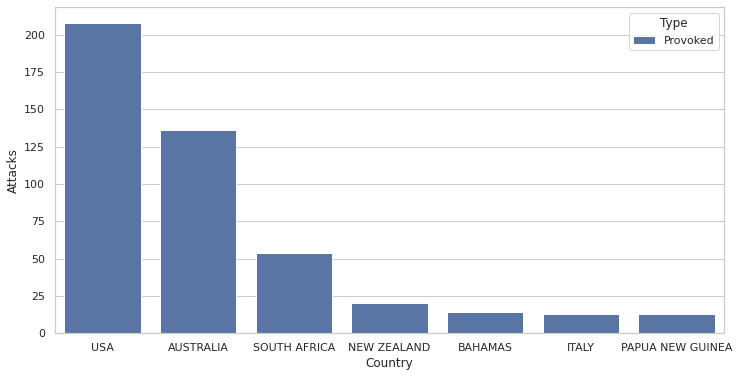

In [70]:
sns.barplot(data=df_provoked_plot, x='Country', y='Attacks', hue='Type');

### STORYTELLING

Este grafico lo que nos muestra son la cantidad de ataques PROVOCADOS en total en cada pais.
Se han vuelto a aplicar filtros, ya que nuestra base de datos es muy grnade y queremos que tenga algo de relevancia, por ello el filtro aplicado ha sido que se muestren solo los paises que han sufrido mas de 10 ataques PROVOCADOS.
Como era de esperar, ya que EEUU, es el pais con mas ataques, es normal que se encuentre primero en el recuento de todos los tipos de ataques, por encima de 200 ataques provocados a los tiburones, seguido esta Australia y en tercer lugar Sudafrica

#### Ahora los que no son provocados

In [50]:
df_type_unprovoked = df_type_updated[(df_type_updated.Type == 'Unprovoked')]

In [51]:
df_unprovoked_plot = df_type_unprovoked[(df_type_unprovoked.Attacks > 50)]

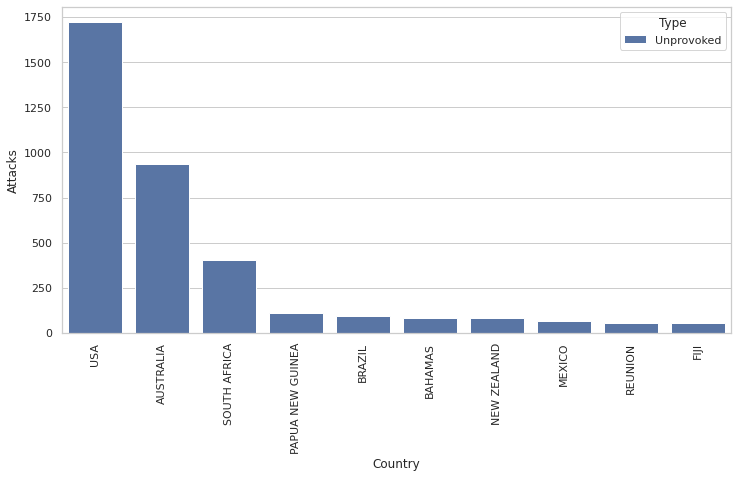

In [52]:
ax2 = sns.barplot(data=df_unprovoked_plot, x='Country', y='Attacks', hue='Type');
ax2.set_xticklabels(ax2.get_xticklabels(),rotation = 90);

### STORYTELLING

#### Ahora vemos los ataques que han habido por pais que son NO PROVOCADOS, esto nos quiere decir, aquellos donde el tiburon ha ido a atacar sin haber sido incitado.
Se ha vuelto a aplicar un filtro en este grafico, que nos muestra tan solo donde ha habido mas de 50 ataques sin provocar.
EEUU en primer lugar se puede ver que la cantidad de ataques sin provocar es de casi 1750, Australia, en segundo lugar no llega a los 1000 y Sudafrica se quda en torno a los 750.
#### ¿Relacion no provocados/ provocados?
Si tenemos en cuenta el grafico anterior podemos hacer una estimacion sobre la relacion entre los ataques provocados y los no provocados en los 3 paises principales (EEUU, Australia, Sudafrica).
- EEUU 1700/210 = 8.1
- Australia 900/130 = 6.9
- Sudafrica 400/52 = 7.7


Estas son aproximaciones, pero nos dan una idea de la relacion que hay entre los ataques no provocados y los provocados, siendo Australia el pais con una relacion menor, lo que quiere decir que de loes 3 paises mas atacados, EEUU, Australia y Sudafrica, son los que mas provocan los accidenes en relacion a los no provocados.

#### Ahora vamos a ver los que han sido provocados por un desastre del mar

In [53]:
df_type_sea_disaster = df_type_updated[(df_type_updated.Type == 'Sea Disaster')]

In [54]:
df_disaster_plot = df_type_sea_disaster[(df_type_sea_disaster.Attacks > 5)]

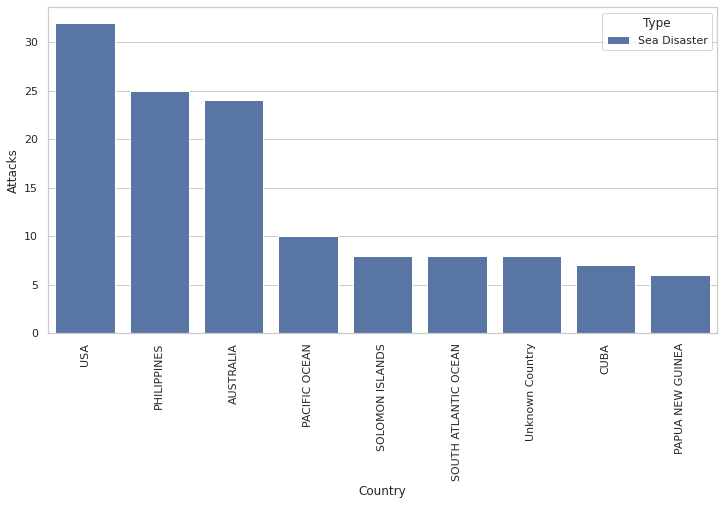

In [55]:
ax3=sns.barplot(data=df_disaster_plot, x='Country', y='Attacks', hue='Type');
ax3.set_xticklabels(ax3.get_xticklabels(),rotation = 90);

### SORTYTELLING

En este grafico se muestran los ataques producidos por ataques realcionados con desastres del mar. Esto nos quiere decir sobre algun efecto mareal, tormentas o algun hecho donde hace que haya una migracion de tiburones mayor de los nomrla a una zona.
Como es de esperar EEUU, ocupa el primer puesto, ya que es el pais con mas ataques, aun asi estos ataques apenas superan los 30 ataques. Soprendentemente, Filipinas se encuentra en segundo lugar, con apenas una diferencia de 2/3 ataques por desastre del mar mas que Australia. Esto se puede deber a que en Filipinas tienen mayores y mas frecuentes tormentas, tifones y demas eventos naturales que pueden afectar a esta migracion inusual de tiburones.

#### Vamos a hacer ahora lo mismo pero con los que son desconocidos

In [56]:
df_type_unknown = df_type_updated[(df_type_updated.Type == 'Unknown attack type')]

In [57]:
df_unknown_plot = df_type_unknown[(df_type_unknown.Attacks >= 2)]

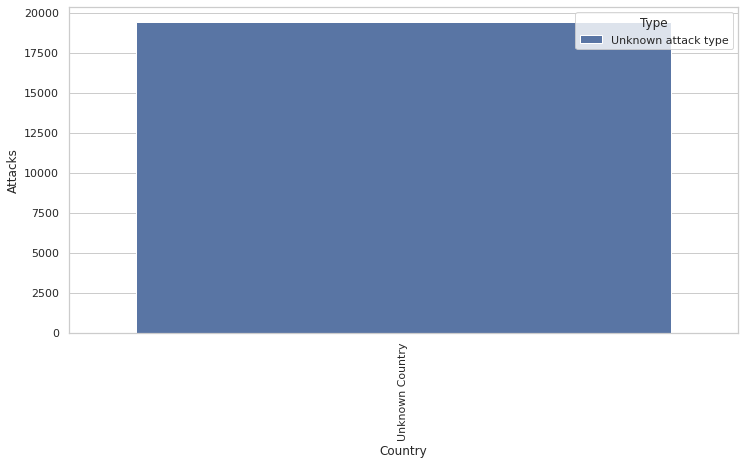

In [58]:
ax4=sns.barplot(data=df_unknown_plot, x='Country', y='Attacks', hue='Type');
ax4.set_xticklabels(ax4.get_xticklabels(),rotation = 90);

### Storytelling
Este grafico de arriba nos dice que en todos los paises que se han recogido los datos se sabe de que ataque son
el unknown country y ek unknown attack type son los valores nulos del dataframe que teniamos, por lo tanto se llega a la
conclusion de que no ha haido ningun tipo de ataque desconocido en algun pais conocido (si tiene sentido esto ultimo)

- Ya que en nuestro data frame (df_limpito) tenemos muchos unknowns tanto en la column de activity y en la de species, vamos a crear un nuevo data frame donde estas dos no aparezcan y este mas limpio solo con lo que nos interesa representar

In [80]:
df_limpito2 = df_limpito[(df_limpito['Species '] != 'Species unknown') & (df_limpito['Activity'] != 'Unknown activity')]

Ahora que ya lo tenemos limpio vamos a poder representar todas nuestras especies y actividades de manera mas clara y comoda

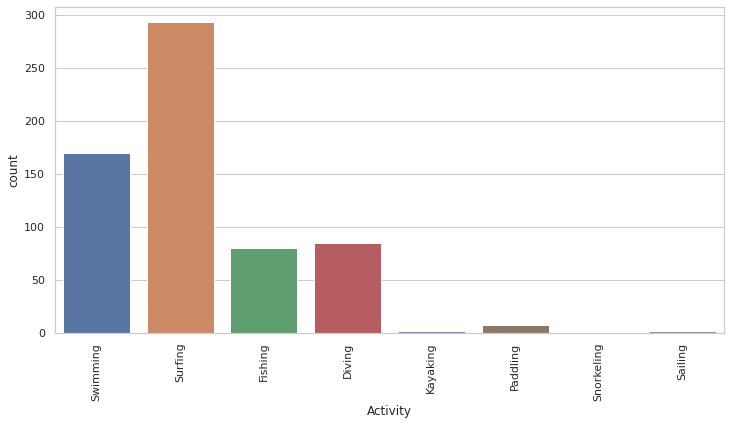

In [82]:
ax_activity = sns.countplot(x=df_limpito2.Activity);
ax_activity.set_xticklabels(ax_activity.get_xticklabels(),rotation = 90);

### STORYTELLING

En este grafico podemos observar que actividad la que ha sufrido los mayores ataques de tiburones.
Se puede llegar a pensar que el nado podria ser la actividad mas castigada por los tiburones, pero si vamos un poco mas alla, caemos en la conclusion de que los tiburones no se suelen encontrar muy cerca de la costa y cuando se suele nadar es mas cerca. Sin embargo, el surf si se suele hacer un poco mas alejados de la costa, por donde pude haber mayor concentracion de tiburones.
Diving (buceo) se situa como la tercera actividad mas castigada por ataques de tiburones, esto tiene sentido ya que bucear se suele practicar en oceano mas abierto y claro, al estar mas en la profundidad, uno esta mas a la altura de los tiburones y estos tienen mas facilidad para localizar a la presa y atacar.

##### Veamos las especies de tiburones que mas atacan

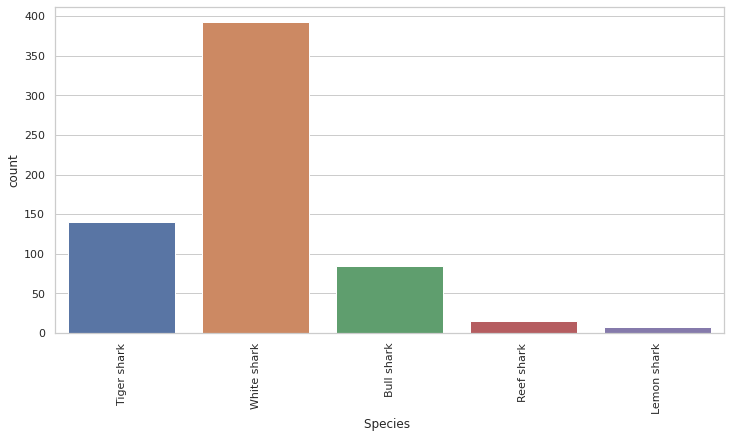

In [84]:
ax_species = sns.countplot(x=df_limpito2['Species ']);
ax_species.set_xticklabels(ax_species.get_xticklabels(),rotation = 90);

### STORYTELLING

Finalmente y como no podia ser de otra manera, observamos en este grafico que especie de tiburon es la que mas ataca.
El tiburon blanco se encuentra en primer lugar, esto no sorprende ya que esta especie de tiburon es la mas comun dentro de todos los tiburones. La segunda especie que mas ataques tiene dentro de este dataset es el tiburon tigre, esta por encima del tiburon toro, esto a priori puede sorprender ya que el segundo tipo de tiburon mas comun del planeta es el tiburon toro, siendo el tigre  el cuarto mas comun.
- ¿Y entonces? ¿Como tiene el tiburon tigre en nuestro registro mas de 100 ataques que el toro?

Se debe simplemente a la loacalizacion geografica. Pese el toro a ser mas numeroso que el tigre, este se encuentra en mas partes del mundo que el toro. En una localizacion donde se encontrasen ambos, el toro seria mas problematico, pero si se habla en terminos globales, el tigre esta mas extendido y por ello registra mas ataques que el toro.

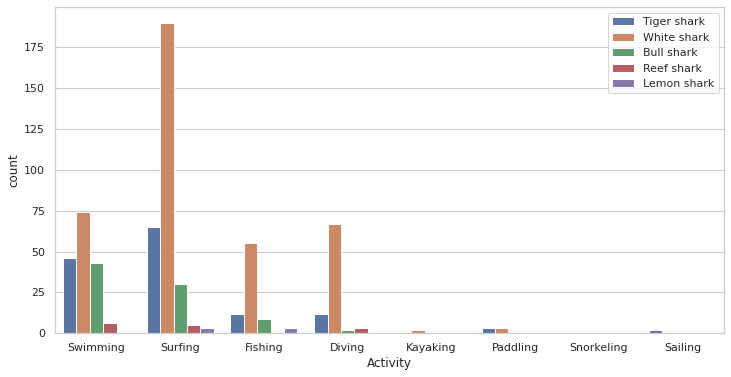

In [96]:
sns.countplot(x=df_limpito2.Activity, hue=df_limpito2['Species ']);
plt.legend(loc = 'upper right');

### STORYTELLING

En este ultimo grafico podemos ver la los ataques de cada especie de tiburon segun que actividad.
Logicamente, como hemos visto antes, que el tiburon blanco tiene el mayor numero de ataques, es el que destaca en todas las actividades. Donde se hace mas notorio es en el surf, muy por encima del tiburon tigre, mientras que si nos fijamos en el swimming se puede observar una mayor equipariedad entre los ataques de las tres especies mas dominantes (Blanco, Tigre y Toro).
El tigre esta en segundo lugar, por lo comentado en el anterior grafico, pero entoces....
#### ¿Por que el tiburon toro esta tan parejo en cuanto a ataques se refiere en la actividad de swimming y fishing?

Tenemos que tener en cuenta dos aspectos:
- Nadar y pescar se suelen hacer en aguas menos profundas, incluso pescar es una actividad que se realiza tanto en agua salada com en agua dulce.
- El tiburon toro es un tiburon que vive en aguas poco profundas, con menos de 30m de profundidad. Ademas tiene una glandula que le permite vivir en aguas dulces, por ello la pesca es una actividad bastante castigada por el tiburon toro. Siempre teniendo en cuenta que el tiburon blanco es el dominante en todas las actividades.